# Prediction of percentage of a student using supervised learning
## Linear Regression model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the dataset
percent = pd.read_csv(r"http://bit.ly/w-data")
percent

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#check missing values
percent.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
#check datatype
percent.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
for i in percent.columns:
    print(i,":",percent[i].unique(),"\n")

Hours : [2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 1.9 6.1
 7.4 4.8 3.8 6.9 7.8] 

Scores : [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 24 67 69 54 35 76 86] 



In [7]:
percent.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


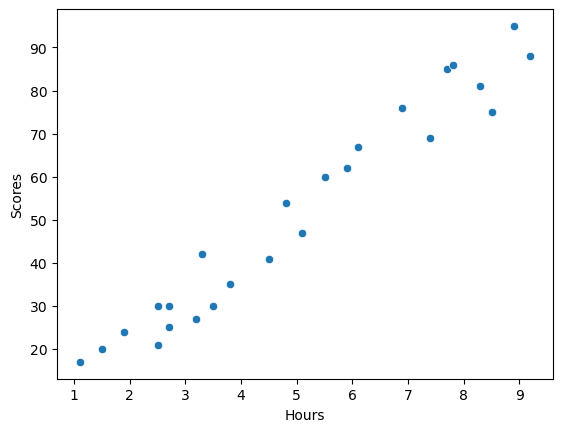

In [8]:
sns.scatterplot(x=percent.Hours,y=percent.Scores)
plt.show()

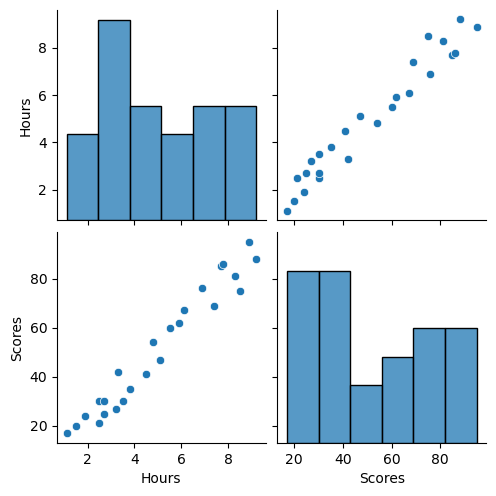

In [9]:
sns.pairplot(percent)
plt.show()

In [10]:
#input-output creation
ip = percent.drop('Scores',axis=1)
op = percent.Scores

In [11]:
ip.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [12]:
op.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [13]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ip, op, test_size=0.2)

In [14]:
x_train

,Hours
0,2.5
12,4.5
5,1.5
10,7.7
24,7.8
13,3.3
6,9.2
23,6.9
11,5.9
22,3.8


In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


In [16]:
#Standard Scaler Transform
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #call the standard scaler

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [17]:
x_train

array([[-1.00014175],
       [-0.20637846],
       [-1.3970234 ],
       [ 1.06364282],
       [ 1.10333098],
       [-0.68263643],
       [ 1.65896529],
       [ 0.7461375 ],
       [ 0.34925585],
       [-0.48419561],
       [-0.60326011],
       [ 0.94457832],
       [-1.00014175],
       [ 1.38114814],
       [-0.08731396],
       [-0.7223246 ],
       [ 0.42863218],
       [-1.55577606],
       [ 1.30177181],
       [-1.23827074]])

In [18]:
#Machine Learning Model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
#Prediction
pred = lr.predict(x_test)
pred

array([27.47285713, 27.47285713, 56.97987469, 92.80982458, 52.76458647])

In [20]:
y_test

9     25
20    30
7     60
15    95
1     47
Name: Scores, dtype: int64

In [21]:
#Accuracy
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(pred, y_test)
r2 = r2_score(pred,y_test)

print("Mean Squared Error: ",mse)
print("R2 Score : ",r2)

Mean Squared Error:  11.929991173931626
R2 Score :  0.9793794057850502


In [22]:
#Graph plot for linear Regression- linear Model Plot
df = pd.DataFrame({'Y_Test':list(y_test), 'prediction':pred})
df

,Y_Test,prediction
0,25,27.472857
1,30,27.472857
2,60,56.979875
3,95,92.809825
4,47,52.764586


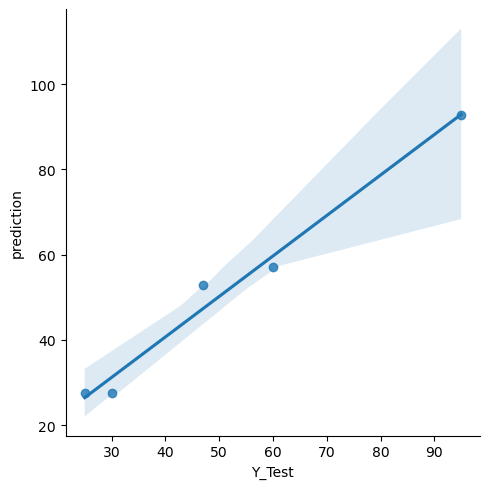

In [23]:
sns.lmplot(x='Y_Test',y='prediction',data=df)
plt.show()